In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from scipy.signal import convolve2d
from skimage.measure import label
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

In [2]:
# Read the data
data = np.load('fashion_train.npy')
test = np.load('fashion_test.npy')

# Split the data into features and labels
X_data = data[:, :-1]
y_data = data[:, -1]

X_test = test[:, :-1]
y_test = test[:, -1]

In [3]:
# split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

In [4]:
label_dict = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Shirt'}

# Labels to names
labels = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt'])

In [5]:
# get count of different labels in the training set
for dataset, name in zip([y_train, y_val, y_test], ['Training', 'Validation', 'Test']):
    print(f'{name} dataset:')
    unique, counts = np.unique(dataset, return_counts=True)
    print(dict(zip(labels[unique], counts)))
    print(dict(zip(labels[unique], counts / len(dataset) * 100)))
    print()

Training dataset:
{'T-shirt/top': 1627, 'Trouser': 1554, 'Pullover': 1591, 'Dress': 1610, 'Shirt': 1618}
{'T-shirt/top': 20.3375, 'Trouser': 19.425, 'Pullover': 19.8875, 'Dress': 20.125, 'Shirt': 20.225}

Validation dataset:
{'T-shirt/top': 406, 'Trouser': 393, 'Pullover': 410, 'Dress': 395, 'Shirt': 396}
{'T-shirt/top': 20.3, 'Trouser': 19.650000000000002, 'Pullover': 20.5, 'Dress': 19.75, 'Shirt': 19.8}

Test dataset:
{'T-shirt/top': 1000, 'Trouser': 1000, 'Pullover': 1000, 'Dress': 1000, 'Shirt': 1000}
{'T-shirt/top': 20.0, 'Trouser': 20.0, 'Pullover': 20.0, 'Dress': 20.0, 'Shirt': 20.0}



In [6]:
def getLargestCC(segmentation):
    labels = label(segmentation)
    assert( labels.max() != 0 ) # assume at least 1 CC
    largestCC = labels == np.argmax(np.bincount(labels.flat)[1:])+1
    return largestCC

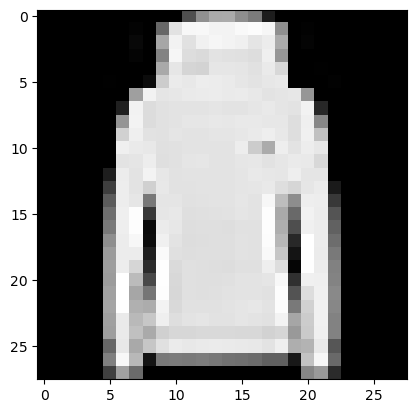

In [7]:
plt.imshow(X_train[3].reshape(28, 28), cmap='gray')

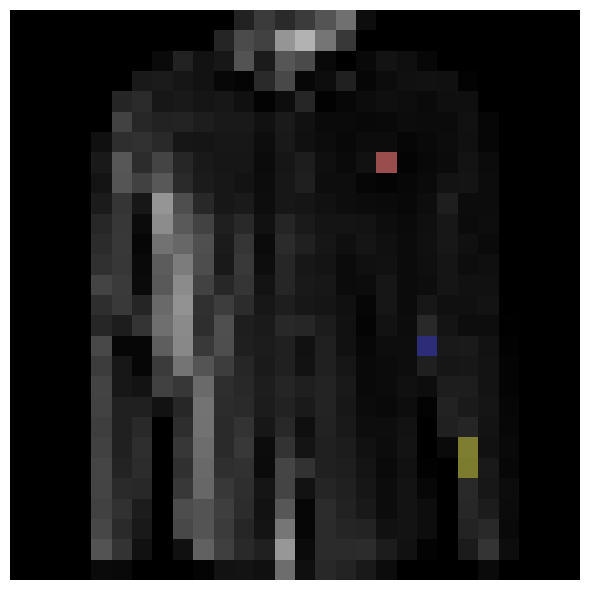

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

img = X_train[0].reshape(28, 28)
thresh = threshold_otsu(img)
bw = closing(img > thresh, square(3))

cleared = clear_border(bw)
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=img, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()


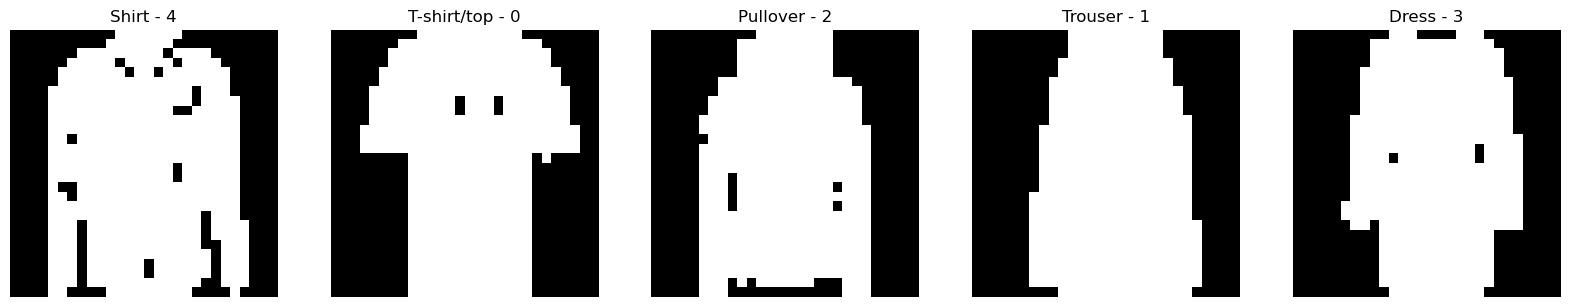

In [65]:
# print out the first 5 differently labeled 28x28 images in the training set and their labels
plt.figure(figsize=(20, 100))

vis = set()
i = 0
k = 0

while k < 5:
    X = X_train[i]
    label = y_train[i]
    if label in vis:
        i += 1
        continue

    mask = 1/16 * np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ])
    

    plt.subplot(1, 5, k + 1)
    img = X.reshape(28, 28)
    img = img > 10
    # img = convolve2d(img, mask)

    plt.imshow(img, cmap='gray')
    plt.title(f"{labels[label]} - {label}")
    plt.axis('off')
    vis.add(label)
    k += 1
    i += 1

In [ ]:
# convert all images in the training set to boolean values (True if pixel value > 35, False otherwise)
X_train_bool = X_train > 35

plt.imshow(X_train_bool[2].reshape(28, 28), cmap='gray')

In [ ]:
# PCA of training set
from sklearn.decomposition import PCA

pca_data = X_data / 255

pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(pca_data)

In [ ]:
# 2d plot of the first 2 principal components
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.scatter(pca_transformed[y_data == i, 0], pca_transformed[y_data == i, 1], label=label_dict[i])
plt.legend()

In [ ]:
%matplotlib widget
# 3d plot of the first 3 principal components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i in [0, 4]:
    ax.scatter(pca_transformed[y_data == i, 0], pca_transformed[y_data == i, 1], pca_transformed[y_data == i, 2], label=label_dict[i])
plt.legend()

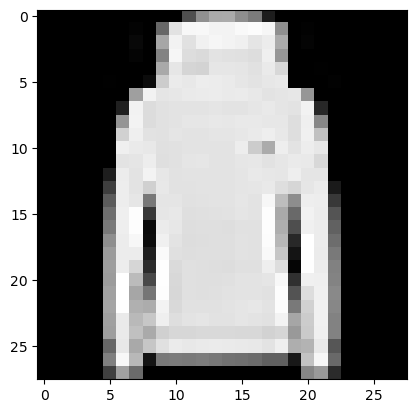

In [58]:
img = X_train[3].reshape(28, 28)

plt.imshow(img, cmap='gray')

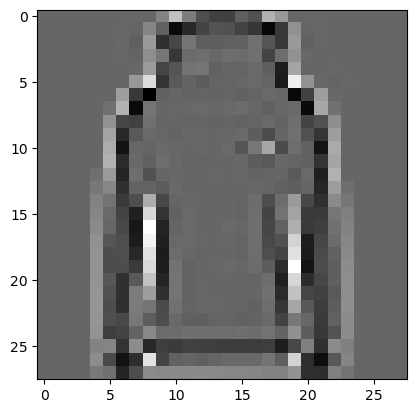

In [59]:
mask = np.array(
    [
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ]
)

edge_img = convolve2d(img, mask, mode = "same")
plt.imshow(edge_img, cmap='gray')

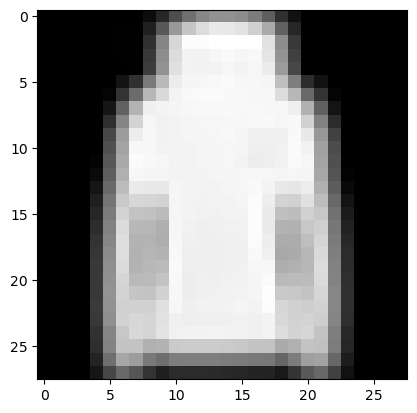

In [60]:
mask = 1/9 * np.array(
    [
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ]
)

edge_img = convolve2d(img, mask, mode = "same")
plt.imshow(edge_img, cmap='gray')